In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

We measure the voltage of a Photodiode as at different angles of the .... 
There seem to be inconsistencies regarding the laser, dropping considerably in intensity.

In [41]:
angles = np.array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 12.5, 11.5, 12.25,  12.35, 12.15, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]) # degrees
voltage = np.array([10.60, 10.44, 10.44, 10.30, 10.41, 10.27, 10.5, 9.60, 4.42, 2.65, 8.91, 3.32, 7.80, 7.83, 6.46, 1.85, 1.82, 1.80, 1.79, 1.75, 1.75, 1.72, 1.73, 1.67, 1.67]) # mV
voltage = - voltage
# set up pandas dataframe for storing data/easy sorting
data = pd.DataFrame()
data['angle'] = angles
data['voltage'] = voltage

# sort data by angle
data = data.sort_values(by='angle')
data

,angle,voltage
24,1.00,-1.67
23,2.00,-1.67
22,3.00,-1.73
21,4.00,-1.72
20,5.00,-1.75
19,6.00,-1.75
18,7.00,-1.79
17,8.00,-1.80
16,9.00,-1.82
15,10.00,-1.85


Text(0, 0.5, 'Voltage (mV)')

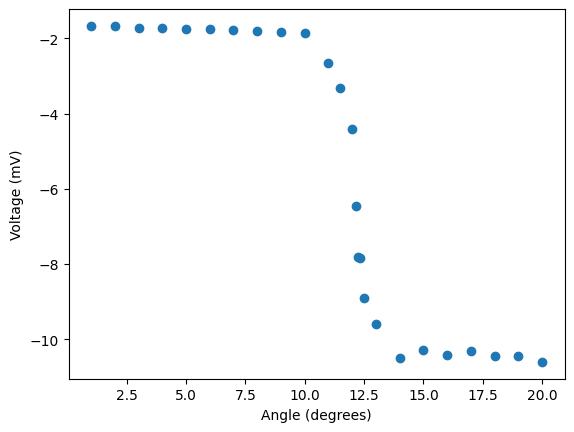

In [42]:
plt.scatter(data['angle'], data['voltage'])
plt.xlabel('Angle (degrees)')
plt.ylabel('Voltage (mV)')
